# News Data Analysis and Visualization
This notebook fetches news data, processes it, and performs text analysis and visualization using the NewsData API.

## Setup API and Dependencies
First, let's import the required libraries and setup our API credentials.

In [ ]:
import pandas as pd
import numpy as np
import newsdataapi
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Setup API credentials
api_key = os.getenv('NEWSDATA_API_KEY')  # Get API key from environment variable
if not api_key:
    raise ValueError("Please set the NEWSDATA_API_KEY environment variable")
api = newsdataapi.NewsDataApiClient(apikey=api_key)

## Fetch News Data
Now we'll use the NewsData API to fetch news articles with specific parameters.

In [6]:
# Fetch news data
response = api.news_api(
    qInMeta='gdp',
    country='us',
    category='business,politics',
    language='en,es'
)

C:\Users\Dell\AppData\Local\Temp\ipykernel_19120\3321521267.py:2: DeprecationWarning: This method is deprecated and will be removed in upcoming updates, Instead use latest_api()
  response = api.news_api(


## Create DataFrame and Extract Titles
Process the API response and create a structured DataFrame.

In [4]:
# Create DataFrame
df = pd.DataFrame(response['results'])
df = df[['article_id', 'title', 'link', 'creator', 'description', 
         'pubDate', 'language', 'country', 'category']]

# Extract titles
news_titles = df.loc[:, 'title'].values

# Create text string for word cloud
text = ""
for x in news_titles:
    text += str(x)

## Generate Word Cloud
Create a visual representation of the most frequent words in the news titles.

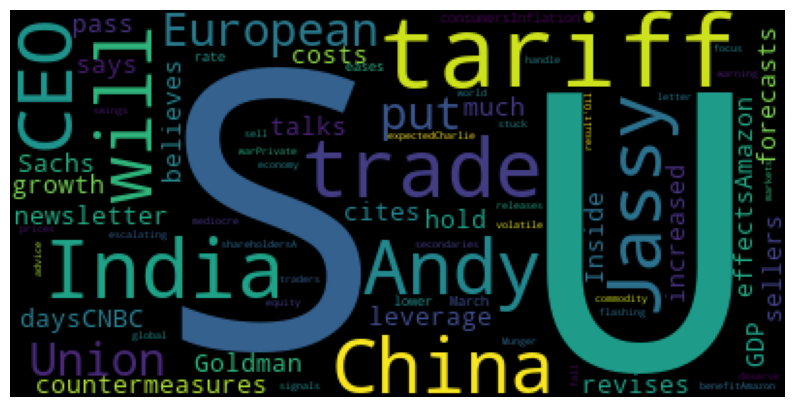

In [5]:
# Generate and display word cloud
wc = WordCloud().generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wc)
plt.axis("off")
plt.show()

## Perform Sentiment Analysis
Process the headlines for sentiment analysis.

In [18]:
# Prepare text for sentiment analysis
txt_sentiment = np.array([], dtype=object)
for title in news_titles:
    title = title.lower()
    #title = re.sub("[\\W\\_]", " ", title)
    #title = re.sub("\\s+", " ", title)
    txt_sentiment = np.append(txt_sentiment, title)

print(txt_sentiment)

['european union to put countermeasures to u.s. tariffs on hold for 90 days'
 "cnbc's inside india newsletter: how much leverage does india have in trade talks with the u.s.?"
 'goldman sachs revises down china gdp growth forecasts, cites tariff effects'
 'amazon ceo andy jassy says he believes sellers will pass increased tariff costs on to consumers'
 'inflation rate eases to 2.4% in march, lower than expected'
 "charlie munger's advice for volatile markets: if you can't handle swings, ‘you deserve the mediocre result'"
 'oil prices fall more than 2% as traders focus on escalating u.s.-china trade war'
 'private equity is more stuck than ever — and secondaries will benefit'
 'amazon ceo andy jassy releases his letter to shareholders'
 'a global commodity sell-off is flashing warning signals for the world economy']


In [19]:
sentiments = np.array([])
for x in txt_sentiment:
    try:
        blob = TextBlob(x)
        sentiment = blob.sentiment.polarity
        if sentiment > 0.1:
            sentiments = np.append(sentiments, "positiv")
        elif sentiment > -0.1:
            sentiments = np.append(sentiments, "neutral")
        else:
            sentiments = np.append(sentiments, "negative")
    except:
        sentiments = np.append(sentiments, "na")

C:\Users\Dell\AppData\Local\Temp\ipykernel_11616\746611841.py:15: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  ax.legend(circular, labels = ["Positiv", "Neutral", "Negative"], loc = "upper right")


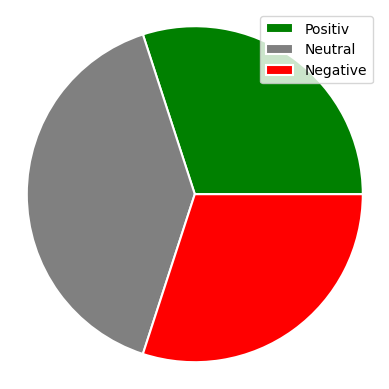

In [20]:
positives = len(sentiments[sentiments == "positiv"])
neutral   = len(sentiments[sentiments == "neutral"])
negatives = len(sentiments[sentiments == "negative"])
y = [positives, neutral, negatives]

# plot
fig, ax = plt.subplots()
circular = ax.pie(
  y, colors = ["green", "gray", "red"],
  radius = 2, center = (3, 3),
  wedgeprops = {"linewidth": 1.5, "edgecolor": "white"},
  frame = True
)

ax.legend(circular, labels = ["Positiv", "Neutral", "Negative"], loc = "upper right")
no_print = plt.axis('off')
plt.show()